In [4]:
pip install opencv-python-headless matplotlib

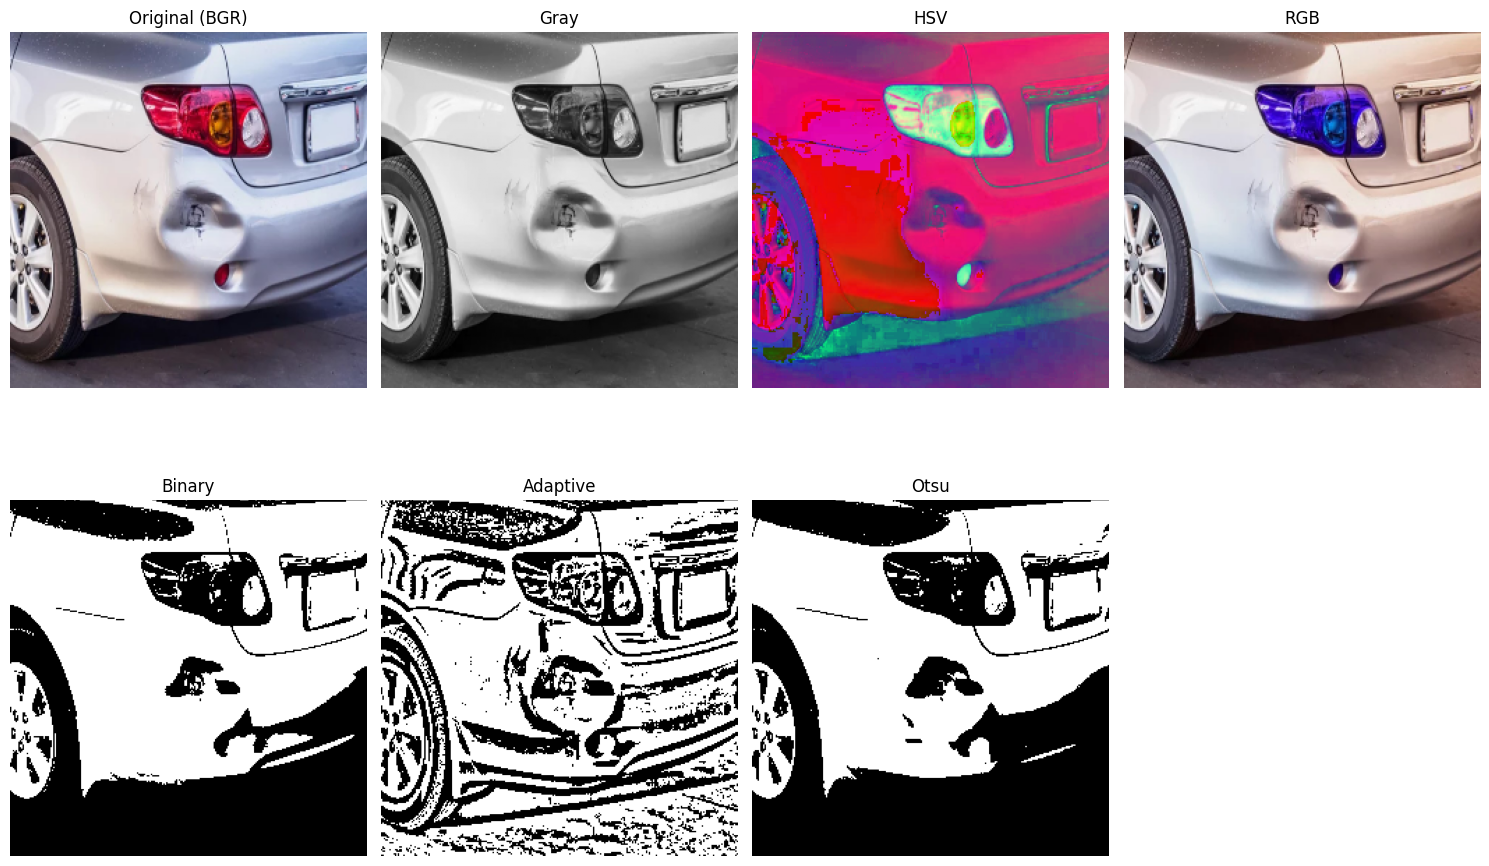

✅ Accurate damage area detected:
→ Height: 215 px
→ Width: 256 px


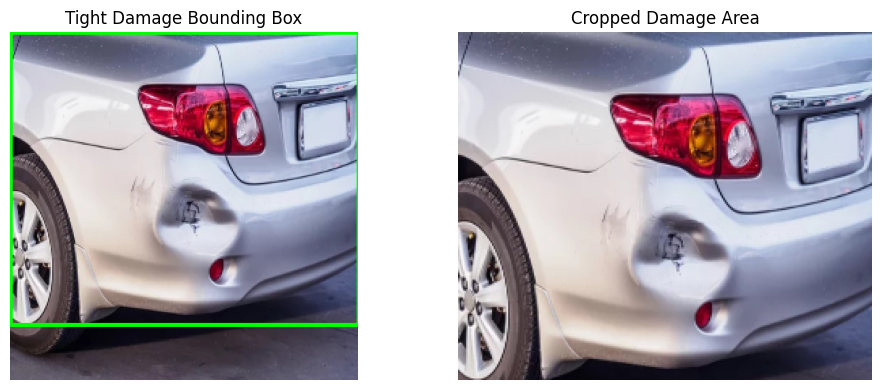

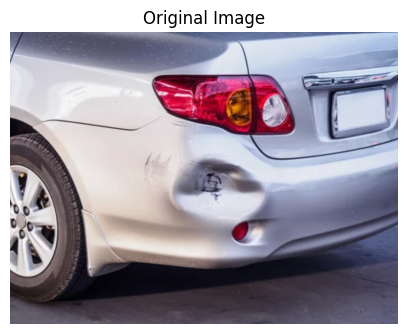

In [15]:
# 📌 Import required packages
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = '/content/car1.jpg'
img = cv2.imread(img_path)

# Check if image is loaded correctly
if img is None:
    raise FileNotFoundError(f"❌ Image not found at path: {img_path}")

# 📌 Resize image
def resize_image(img, size=(256, 256)):
    return cv2.resize(img, size)

# 📌 Convert color spaces
def convert_color_spaces(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return gray, hsv, rgb

# 📌 Apply thresholding
def thresholding(img_gray):
    _, binary = cv2.threshold(img_gray, 120, 255, cv2.THRESH_BINARY)
    adaptive = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                     cv2.THRESH_BINARY, 11, 2)
    otsu = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    return binary, adaptive, otsu

# 📌 Preprocess pipeline
resized = resize_image(img)
gray, hsv, rgb = convert_color_spaces(resized)
binary, adaptive, otsu = thresholding(gray)

# 📌 Display preprocessing outputs
titles = ['Original (BGR)', 'Gray', 'HSV', 'RGB', 'Binary', 'Adaptive', 'Otsu']
images = [resized, gray, hsv, rgb, binary, adaptive, otsu]

plt.figure(figsize=(15,10))
for i in range(len(images)):
    plt.subplot(2, 4, i+1)
    if len(images[i].shape) == 2:
        plt.imshow(images[i], cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

# ✅ STEP: Improved Accurate Damage Cropping

# 📌 Apply morphological closing
kernel = np.ones((5, 5), np.uint8)
cleaned = cv2.morphologyEx(otsu, cv2.MORPH_CLOSE, kernel, iterations=2)

# 📌 Find contours
contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 📌 Filter small contours
min_area = 500
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

# 📌 Crop around all damage contours
if filtered_contours:
    all_points = np.concatenate(filtered_contours)
    x, y, w, h = cv2.boundingRect(all_points)

    # Draw bounding box
    img_with_box = resized.copy()
    cv2.rectangle(img_with_box, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Crop
    cropped_damage = resized[y:y+h, x:x+w]

    # Show result
    print(f"✅ Accurate damage area detected:")
    print(f"→ Height: {h} px\n→ Width: {w} px")

    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img_with_box, cv2.COLOR_BGR2RGB))
    plt.title("Tight Damage Bounding Box")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(cropped_damage, cv2.COLOR_BGR2RGB))
    plt.title("Cropped Damage Area")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

    # Show original
    plt.figure(figsize=(5,5))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")
    plt.show()
else:
    print("⚠️ No significant damage area detected.")


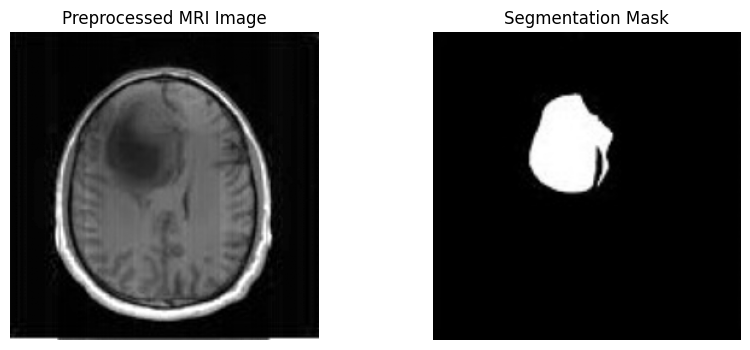

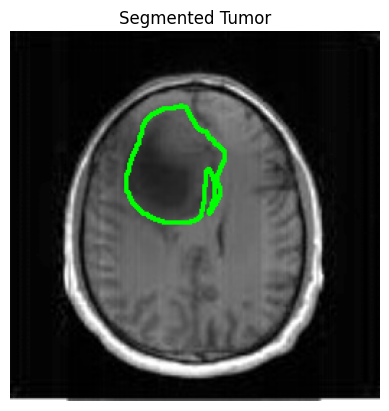

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_60 (Conv2D)  │ (None, 256, 256,  │        640 │ input_layer_4[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_61 (Conv2D)  │ (None, 256, 256,  │     36,928 │ conv2d_60[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_12    │ (None, 128, 128,  │          0 │ conv2d_61[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_62 (Conv2D)  │ (None, 128, 128,  │     73,856 │ max_pooling2d_12… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_63 (Conv2D)  │ (None, 128, 128,  │    147,584 │ conv2d_62[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_13    │ (None, 64, 64,    │          0 │ conv2d_63[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_64 (Conv2D)  │ (None, 64, 64,    │    295,168 │ max_pooling2d_13… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_65 (Conv2D)  │ (None, 64, 64,    │    590,080 │ conv2d_64[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_14    │ (None, 32, 32,    │          0 │ conv2d_65[0][0]   │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_66 (Conv2D)  │ (None, 32, 32,    │  1,180,160 │ max_pooling2d_14… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_67 (Conv2D)  │ (None, 32, 32,    │  2,359,808 │ conv2d_66[0][0]   │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_12    │ (None, 64, 64,    │          0 │ conv2d_67[0][0]   │
│ (UpSampling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_12      │ (None, 64, 64,    │          0 │ up_sampling2d_12… │
│ (Concatenate)       │ 768)              │            │ conv2d_65[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_68 (Conv2D)  │ (None, 64, 64,    │  1,769,728 │ concatenate_12[0… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_69 (Conv2D)  │ (None, 64, 64,    │    590,080 │ conv2d_68[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_13    │ (None, 128, 128,  │          0 │ conv2d_69[0][0] 

 Total params: 7,781,761 (29.69 MB)

 Trainable params: 7,781,761 (29.69 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Install necessary packages (for Colab only)
!pip install opencv-python-headless streamlit scikit-learn matplotlib tensorflow --quiet

# 📌 Import packages
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers, models

# 📌 Load inbuilt image (give your local path here)
image_path = '/content/sample_data/bt1a.jpg'  # MRI image
mask_path = '/content/sample_data/bt1.jpg'  # Segmentation mask

# 📌 Load and preprocess image
def load_image(path):
    return cv2.imread(path, cv2.IMREAD_GRAYSCALE)

def resize_image(image, size=(256, 256)):
    return cv2.resize(image, size)

def normalize_image(image):
    scaler = MinMaxScaler(feature_range=(0, 1))
    return scaler.fit_transform(image)

# Load images
mri_image = load_image(image_path)
mask_image = load_image(mask_path)

# Resize and normalize
mri_image = resize_image(mri_image)
mask_image = resize_image(mask_image)
mri_image = normalize_image(mri_image)

# 📌 Show MRI and mask
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(mri_image, cmap='gray')
plt.title("Preprocessed MRI Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mask_image, cmap='gray')
plt.title("Segmentation Mask")
plt.axis("off")
plt.show()

# 📌 Segment tumor using contours
def segment_tumor(image, mask):
    _, binary = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    result = cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_GRAY2BGR)
    cv2.drawContours(result, contours, -1, (0, 255, 0), 2)
    return result

segmented = segment_tumor(mri_image, mask_image)

# 📌 Show segmented output
plt.imshow(segmented)
plt.title("Segmented Tumor")
plt.axis("off")
plt.show()

# 📌 Define U-Net model
def unet_model(input_size=(256, 256, 1)):
    inputs = layers.Input(input_size)
    c1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, 3, activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D(2)(c1)

    c2 = layers.Conv2D(128, 3, activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, 3, activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D(2)(c2)

    c3 = layers.Conv2D(256, 3, activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, 3, activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D(2)(c3)

    c4 = layers.Conv2D(512, 3, activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, 3, activation='relu', padding='same')(c4)

    u1 = layers.UpSampling2D(2)(c4)
    u1 = layers.concatenate([u1, c3])
    c5 = layers.Conv2D(256, 3, activation='relu', padding='same')(u1)
    c5 = layers.Conv2D(256, 3, activation='relu', padding='same')(c5)

    u2 = layers.UpSampling2D(2)(c5)
    u2 = layers.concatenate([u2, c2])
    c6 = layers.Conv2D(128, 3, activation='relu', padding='same')(u2)
    c6 = layers.Conv2D(128, 3, activation='relu', padding='same')(c6)

    u3 = layers.UpSampling2D(2)(c6)
    u3 = layers.concatenate([u3, c1])
    c7 = layers.Conv2D(64, 3, activation='relu', padding='same')(u3)
    c7 = layers.Conv2D(64, 3, activation='relu', padding='same')(c7)

    outputs = layers.Conv2D(1, 1, activation='sigmoid')(c7)
    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 📌 Initialize and summarize the model
model = unet_model()
model.summary()


In [1]:
pip install opencv-python easyocr numpy

Saving np2.jpg to np2 (1).jpg
🖼️ Cropped Number Plate Image:


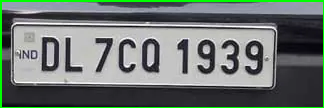

✅ Detected Number Plate Text: AIND (Confidence: 0.19)
✅ Detected Number Plate Text: DL 7cQ 1939 (Confidence: 0.50)
📷 Original Image with Plate Detection:


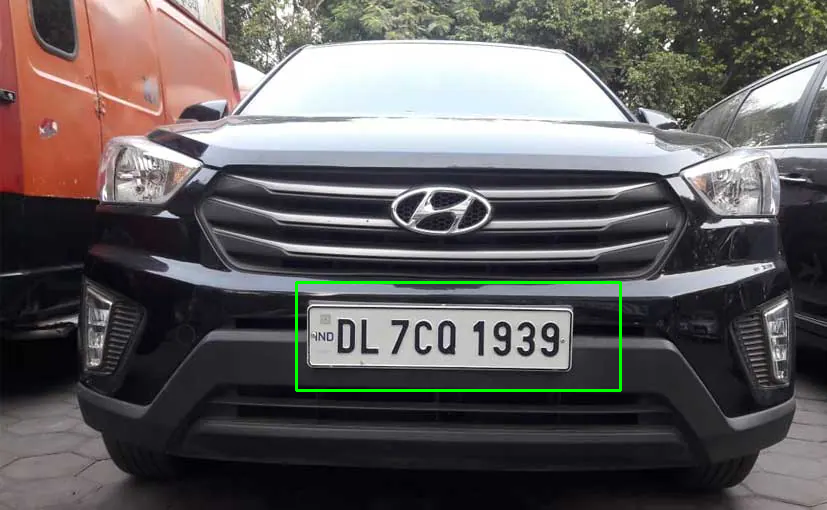

In [12]:
#pip install opencv-python easyocr numpy

from google.colab import files
from IPython.display import display
from PIL import Image
import cv2
import easyocr
import numpy as np
from google.colab.patches import cv2_imshow

# Upload image
uploaded = files.upload()

# Get uploaded file name
for filename in uploaded.keys():
    image_path = filename

# Step 2: Load and process image
image = cv2.imread(image_path)

if image is None:
    print("❌ Image not found or not uploaded properly.")
else:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Load Haar cascade for number plate detection
    plate_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_russian_plate_number.xml')
    plates = plate_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4, minSize=(30, 30))

    if len(plates) == 0:
        print("❌ No plate detected using Haar Cascade. Falling back to full image OCR...")
        reader = easyocr.Reader(['en'])
        result = reader.readtext(gray)
        for (_, text, prob) in result:
            print(f"🔍 Full Image OCR: {text} (Confidence: {prob:.2f})")
    else:
        for (x, y, w, h) in plates:
            # Draw rectangle on original image (optional)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

            # Crop and display the number plate
            plate_crop = image[y:y + h, x:x + w]
            print("🖼️ Cropped Number Plate Image:")
            cv2_imshow(plate_crop)

            # OCR
            reader = easyocr.Reader(['en'])
            result = reader.readtext(plate_crop)

            if result:
                for (_, text, prob) in result:
                    print(f"✅ Detected Number Plate Text: {text} (Confidence: {prob:.2f})")
            else:
                print("❌ OCR failed on cropped plate. Trying full image OCR...")
                result = reader.readtext(gray)
                for (_, text, prob) in result:
                    print(f"🔍 Full Image OCR: {text} (Confidence: {prob:.2f})")


    print("📷 Original Image with Plate Detection:")
    cv2_imshow(image)

